In [2]:
from alpaca.experimental_data.measurements_exp import babar_upsilon3S, belle_upsilon1S, besIII_Jpsiinv, besIII_Jpsivis, belleII_upsilon4s
from alpaca import ALPcouplings, branching_ratio, cross_section
from alpaca.constants import mUpsilon4S
from alpaca.common import alpha_em
from alpaca import citations
import numpy as np
import matplotlib.pyplot as plt
plt.rcParams.update({'text.usetex':True})

ModuleNotFoundError: No module named 'alpaca'

We are going to reproduce some plots corresponding to the decays of quarkonia into photon plus invisible ($\Upsilon \to \gamma a$ and $J/\psi \to \gamma a$) from 

> L. di Luzio, A. Guerrera, X. Ponce Díaz, S. Rigolin: *Axion-like particles in radiative quarkonia decays*. JHEP 06 (2024) 217. [arXiv:2402.12454](https://arxiv.org/abs/2402.12454)

## Plots with two ALP couplings

In [13]:
ma = 0.2001 #GeV

upsilon1 = belle_upsilon1S(ma)
upsilon3 = babar_upsilon3S(ma)
jpsi = besIII_Jpsiinv(ma)
upsilon4 = np.array(belleII_upsilon4s(ma))*1e12
jpsi_vis = besIII_Jpsivis(ma)
f_a = 1000

aem = alpha_em(ma)

acB0 = ALPcouplings({'cB': 1.0}, scale=4*np.pi*f_a, basis='derivative_above').match_run(ma, 'kF_below')
acD0 = ALPcouplings({'cqL': 1.0}, scale=4*np.pi*f_a, basis='derivative_above').match_run(ma, 'kF_below')


/home/jorge/.cache/pypoetry/virtualenvs/alpaca-dpejbsCX-py3.10/lib64/python3.10/site-packages/scipy/integrate/_ivp/base.py:23: ComplexWarning: Casting complex values to real discards the imaginary part
  return np.asarray(fun(t, y), dtype=dtype)
/home/jorge/Documents/alpaca/alp-aca/alpaca/rge/classes.py:235: ComplexWarning: Casting complex values to real discards the imaginary part
  vals |= {'cg': float(array[53]), "cgamma": float(array[54])}


In [14]:
# Chi-squared function
def chi2_Bd(log_gagamma, log_gabb):

    ac = 10**log_gagamma * f_a * np.pi/aem * acB0 + 10**log_gabb * f_a * acD0
    model_upsilon3 = branching_ratio('Y(3S) -> gamma a', ma, ac, f_a)
    model_upsilon1 = branching_ratio('Y(1S) -> gamma a', ma, ac, f_a)
    model_jpsi = branching_ratio('J/psi -> gamma a', ma, ac, f_a)
    model_upsilon4 = cross_section('e+ e- -> gamma a', ma, ac, mUpsilon4S**2, f_a)
    
    chi2_upsilon3 = np.sum(((upsilon3[0] - model_upsilon3) / upsilon3[1])**2)
    chi2_upsilon1 = np.sum(((upsilon1[0] - model_upsilon1) / upsilon1[1])**2)
    chi2_upsilon4 = np.sum(((upsilon4[0] - model_upsilon4) / upsilon4[1])**2)
    chi2_Jpsi = np.sum(((jpsi[0] - model_jpsi) / jpsi[1])**2)
    chi2_Jpsi_vis = np.sum(((jpsi_vis[0] - model_jpsi) / jpsi_vis[1])**2)
    
    return chi2_upsilon1 + chi2_Jpsi + chi2_upsilon4 + chi2_Jpsi_vis + chi2_upsilon3 

In [15]:
x_Bd, y_Bd = np.meshgrid(np.linspace(-5, -2, 100), np.linspace(-5, -2, 100))
logx_Bd, logy_Bd = np.meshgrid(np.logspace(-5, -2, 100), np.logspace(-5, -2, 100))
chiBd_mesh = np.vectorize(chi2_Bd)(x_Bd, y_Bd)

Text(0.5, 1.0, '$m_a = 0.2001\\,\\mathrm{GeV},\\qquad f_a = 1.0\\,\\mathrm{TeV},\\qquad\\mu = 4\\pi f_a$')

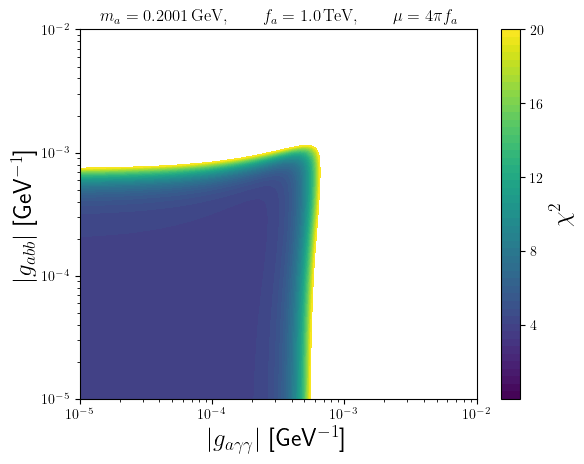

In [16]:
plt.contourf(logx_Bd, logy_Bd, chiBd_mesh, levels=np.linspace(0, 20, 50), cmap='viridis')
plt.xlabel(r'$|g_{a\gamma\gamma}|$ [GeV$^{-1}$]', fontsize=18)
plt.ylabel(r'$|g_{abb}|$ [GeV$^{-1}$]', fontsize=18)
cbar = plt.colorbar()
cbar.set_label(r'$\chi^2$', fontsize=18)
cbar.set_ticks(np.linspace(4, 20, 5))
ax = plt.gca()
ax.set_xscale('log')
ax.set_yscale('log')
plt.title(r'$m_a = ' + str(ma) + '\,\mathrm{GeV},\qquad f_a = ' + str(f_a/1000) +'\,\mathrm{TeV},\qquad\mu = 4\pi f_a$')

In [6]:
# Chi-squared function
def chi2_Bd_m(log_gagamma, log_gabb):

    ac = 10**log_gagamma * f_a * np.pi/aem * acB0 + (- 10**log_gabb) * f_a * acD0
    model_upsilon3 = branching_ratio('Y(3S) -> gamma a', ma, ac, f_a)
    model_upsilon1 = branching_ratio('Y(1S) -> gamma a', ma, ac, f_a)
    model_jpsi = branching_ratio('J/psi -> gamma a', ma, ac, f_a)
    model_upsilon4 = cross_section('e+ e- -> gamma a', ma, ac, mUpsilon4S**2, f_a)
    
    chi2_upsilon3 = np.sum(((upsilon3[0] - model_upsilon3) / upsilon3[1])**2)
    chi2_upsilon1 = np.sum(((upsilon1[0] - model_upsilon1) / upsilon1[1])**2)
    chi2_upsilon4 = np.sum(((upsilon4[0] - model_upsilon4) / upsilon4[1])**2)
    chi2_Jpsi = np.sum(((jpsi[0] - model_jpsi) / jpsi[1])**2)
    chi2_Jpsi_vis = np.sum(((jpsi_vis[0] - model_jpsi) / jpsi_vis[1])**2)
    
    return chi2_upsilon1 + chi2_Jpsi + chi2_upsilon4 + chi2_Jpsi_vis + chi2_upsilon3 # 

In [7]:
chiBd_m_mesh = np.vectorize(chi2_Bd_m)(x_Bd, y_Bd)

Text(0.5, 1.0, '$m_a = 0.2001\\,\\mathrm{GeV},\\qquad f_a = 1.0\\,\\mathrm{TeV},\\qquad\\mu = 4\\pi f_a$')

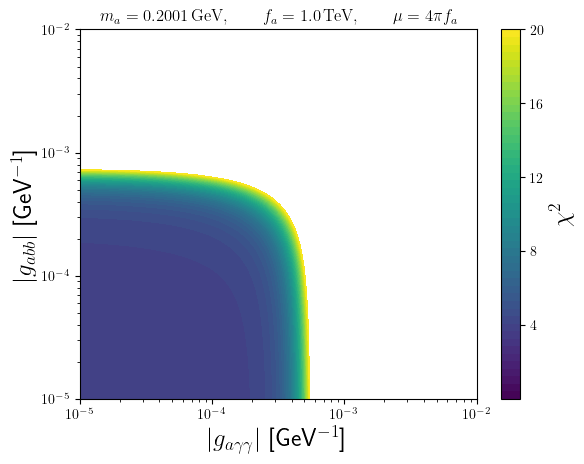

In [8]:
plt.contourf(logx_Bd, logy_Bd, chiBd_m_mesh, levels=np.linspace(0, 20, 50), cmap='viridis')
plt.xlabel(r'$|g_{a\gamma\gamma}|$ [GeV$^{-1}$]', fontsize=18)
plt.ylabel(r'$|g_{abb}|$ [GeV$^{-1}$]', fontsize=18)
cbar = plt.colorbar()
cbar.set_label(r'$\chi^2$', fontsize=18)
cbar.set_ticks(np.linspace(4, 20, 5))
ax = plt.gca()
ax.set_xscale('log')
ax.set_yscale('log')
plt.title(r'$m_a = ' + str(ma) + '\,\mathrm{GeV},\qquad f_a = ' + str(f_a/1000) +'\,\mathrm{TeV},\qquad\mu = 4\pi f_a$')

## Plot of $g_{a\gamma\gamma}$ vs $m_a$

In [9]:
def chi2_mass(log_ma, log_gagamma):
    ma = 10**log_ma
    ac = 10**log_gagamma * f_a * np.pi/aem * ALPcouplings({'cgamma': 1.0}, ma, 'kF_below')


    model_upsilon3 = branching_ratio('Y(3S) -> gamma a', ma, ac, f_a)
    model_upsilon1 = branching_ratio('Y(1S) -> gamma a', ma, ac, f_a)
    model_jpsi = branching_ratio('J/psi -> gamma a', ma, ac, f_a)
    model_upsilon4 = cross_section('e+ e- -> gamma a', ma, ac, mUpsilon4S**2, f_a)
    
    chi2tot = 0
    if upsilon3[1] != 0:
        chi2tot += np.sum(((upsilon3[0] - model_upsilon3) / upsilon3[1])**2)
    if upsilon1[1] != 0:
        chi2tot += np.sum(((upsilon1[0] - model_upsilon1) / upsilon1[1])**2)
    if upsilon4[1] != 0:
        chi2tot += np.sum(((upsilon4[0] - model_upsilon4) / upsilon4[1])**2)
    if jpsi[1] != 0:
        chi2tot += np.sum(((jpsi[0] - model_jpsi) / jpsi[1])**2)
    if jpsi_vis[1] != 0:
        chi2tot += np.sum(((jpsi_vis[0] - model_jpsi) / jpsi_vis[1])**2)
    
    return chi2tot

In [10]:
x_m, y_m = np.meshgrid(np.linspace(-1, 1, 100), np.linspace(-5, -2, 100))
logx_m, logy_m = np.meshgrid(np.logspace(-1, 1, 100), np.logspace(-5, -2, 100))
chi_m_mesh = np.zeros([100, 100], dtype=float)
for i in range(100):
    ma = logx_m[0,i]
    upsilon1 = belle_upsilon1S(ma)
    upsilon3 = babar_upsilon3S(ma)
    jpsi = besIII_Jpsiinv(ma)
    upsilon4 = np.array(belleII_upsilon4s(ma))*1e12
    jpsi_vis = besIII_Jpsivis(ma)
    for j in range(100):
        chi_m_mesh[j,i] = chi2_mass(x_m[j,i], y_m[j,i])

Text(0.5, 1.0, '$f_a = 1.0\\,\\mathrm{TeV}$')

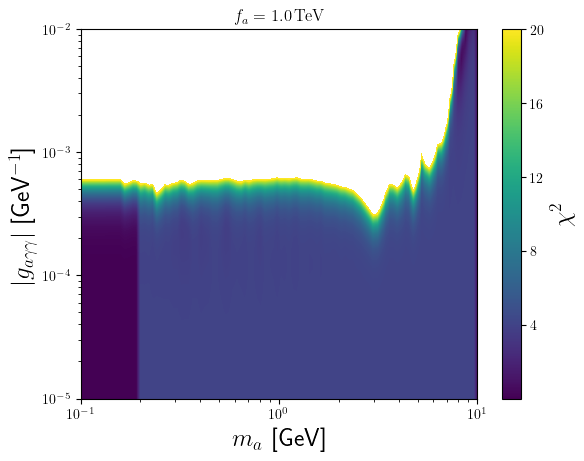

In [11]:
plt.contourf(logx_m, logy_m, chi_m_mesh, levels=np.linspace(0, 20, 500), cmap='viridis')
plt.ylabel(r'$|g_{a\gamma\gamma}|$ [GeV$^{-1}$]', fontsize=18)
plt.xlabel(r'$m_a$ [GeV]', fontsize=18)
cbar = plt.colorbar()
cbar.set_label(r'$\chi^2$', fontsize=18)
cbar.set_ticks(np.linspace(4, 20, 5))
ax = plt.gca()
ax.set_xscale('log')
ax.set_yscale('log')
plt.title(r'$f_a = ' + str(f_a/1000) +'\,\mathrm{TeV}$')

Finally we can obtain the list of references used to run the code:

In [12]:
citations.inspires_ids()

['Belle:2018pzt',
 'BaBar:2008aby',
 'BESIII:2020sdo',
 'Mohr:2024kco',
 'Hwang:1997ie',
 'Virtanen:2019joe',
 'Harris:2020xlr',
 'Straub:2018kue',
 'ParticleDataGroup:2024cfk',
 'Belle-II:2020jti',
 'Merlo:2019anv',
 'Bauer:2020jbp',
 'BESIII:2022rzz',
 'DiLuzio:2024jip',
 'Aebischer:2018bkb']